<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install seaborn -U

    100% |████████████████████████████████| 215kB 15.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
!pip3 install statsmodels -U

    100% |████████████████████████████████| 7.4MB 4.4MB/s 
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0


In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
pd.set_option('display.width', 160)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [3]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [4]:
# more stats & see which fields are null
print(df.describe())
print(df.isnull().sum())


              make          price         body      mileage         engV      engType  registration         year        drive
count  8495.000000    8495.000000  8495.000000  8495.000000  8495.000000  8495.000000   8495.000000  8495.000000  8495.000000
mean     46.535491   16185.453305     2.302295   141.744202     2.568337     1.650618      0.941613  2006.500883     0.575868
std      24.526251   24449.641512     1.610307    97.464062     5.387238     1.341282      0.234488     6.925907     0.741235
min       0.000000     259.350000     0.000000     0.000000     0.100000     0.000000      0.000000  1959.000000     0.000000
25%      23.000000    5490.000000     1.000000    74.000000     1.600000     0.000000      1.000000  2004.000000     0.000000
50%      50.000000    9500.000000     3.000000   130.000000     2.000000     1.000000      1.000000  2008.000000     0.000000
75%      68.000000   17145.600000     3.000000   197.000000     2.500000     3.000000      1.000000  2011.000000     1

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
# set X columns to everything but price
X = df.drop('price', axis=1)
x_cols = df.columns.drop(['price'])
#set y to price
y = df['price']


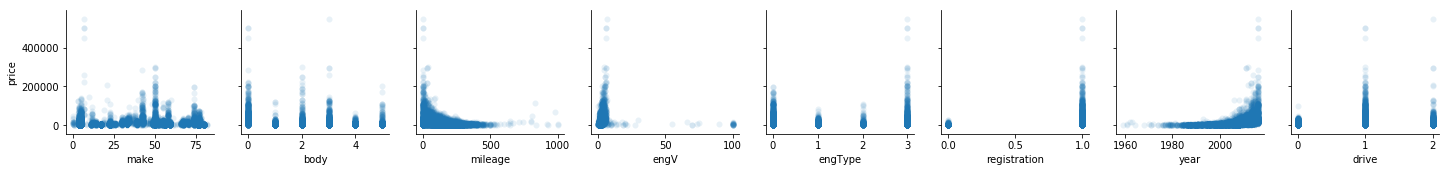

In [6]:
sns.pairplot(data=df, y_vars=['price'], x_vars=x_cols, plot_kws={'alpha': 0.1, 'linewidth':0})

## 1.2 Split the data into test and train datasets using train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
print("Original shape:", X.shape, "\n")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Original shape: (8495, 8) 

X_train shape: (4247, 8)
X_test shape: (4248, 8)
y_train shape: (4247,)
y_test shape: (4248,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [9]:
beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficient: ", beta_i)
print("\nIntercept Value: ", beta_0)

print("\nCoefficients:")
for i in range(X.shape[1]):
  print(X.columns[i], '\t', model.coef_[i])


Slope Coefficient:  -35.224794837138774

Intercept Value:  -2184591.0115608736

Coefficients:
make 	 -35.224794837138774
body 	 -1672.11973554938
mileage 	 -37.12848398637675
engV 	 269.6158254360521
engType 	 -1284.7437596238408
registration 	 4649.462253388958
year 	 1098.2829573042409
drive 	 7886.890791475622


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [11]:
RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
R2= r2_score(y_test, y_test_predict)

print('\nRMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))



RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

A year increase (ie the more recent the car is) results in an increase of $1098.28 in the price of the car

## 1.8 How should we interpret the Root-Mean-Square Error?

Root Mean Square Error (RMSE) is the standard deviation of the residuals, which are a measure of how far from the regression line data points (ie how concentrated the data is around the line of best fit). With an RMSE of 22470+, this indicates the data is pretty dispersed, and in fact the value is quite distant from the mean price (16185).

## 1.9 How should we interpret the $R^2$?

It shows that, with a value of 26.94 precent, the model is not doing much of a job predicting price.


# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price variable.

**==>> With a mean of 16185, and a max of 547800, it looks like price has a LONG! trailing tail.**

In [0]:
df['ln_price'] = np.log(df['price'])

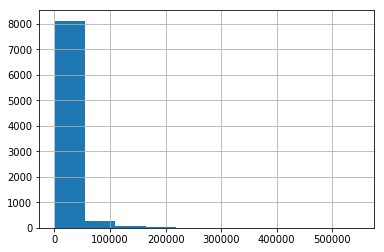

In [13]:
# graph hist of price
df['price'].hist()

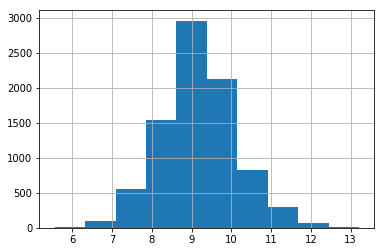

In [14]:
# graph hist of ln_price
df['ln_price'].hist()

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

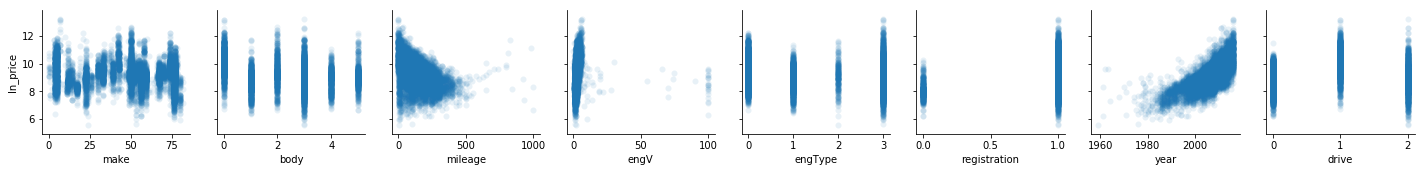

In [15]:
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_cols, plot_kws={'alpha': 0.1, 'linewidth':0})

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# looks to me like, based on the slopes of the charts, it make sense to try mileage down and year up.
# I don't see any patterns in the rest of the data
df['sqrt_mileage'] = df['mileage']**.5
df['year_squared'] = df['year']**2


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [17]:
y = df.loc[:, ['ln_price']].values
X = df.drop(['ln_price','price','mileage','year'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print()
print(X.columns)
print("Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)
print()
#for i in range(X.shape[0]):
#  print(X.columns[i], '\t', model.coef_[i])

y_test_predict = model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
R2= r2_score(y_test, y_test_predict)

print('\nRMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))



Index(['make', 'body', 'engV', 'engType', 'registration', 'drive', 'sqrt_mileage', 'year_squared'], dtype='object')
Coefficients:  [-1.47583045e-03 -8.04518260e-02  9.81323327e-03 -6.46352431e-02
  7.12193612e-01  3.97918685e-01 -9.55298123e-03  2.29112389e-05]

Intercept Value:  [-83.52487361]


RMSE is 0.5668221900430387
R^2 is 0.6587333060551626


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

For the square of each year increase squared, the ln_price goes up fractionally (2.29112389e-05), which makes sense since it's actually the log of price.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

---



Gradient descent is an optimization strategy, used in training a model.

Gradient

A gradient measures the change in all weights with regard to the change in error. It can be thought of as the slope of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning.  Mathematically speaking, a gradient is a partial derivative with respect to its inputs.

Gradient Descent

It can be thought of as a minimization algorithm - analogous to going down the slope until the bottom of the valley is reached. This is effected by taking one step after another in the steepest downside direction, as determined by a formula, until the value of an associated cost function is as small as possible. The Learning Rate (discussed in the next section) determines how fast or slow to move towards the optimal weights. The goal of the algorithm is to find model parameters that minimize the error of the model.

## 3.2 What is the "Learning Rate" and what is its function?

The idea behind Learning Rate is that bigger steps are taken initially, which become progressively smaller as the optimal minimum is approached. One must take care to set the learning rate to an appropriate value, neither too low nor too high. This is because if the steps it takes are too big, it might not reach the local minimum, because it just bounces back and forth between the convex function of gradient descent. If  the learning rate is set to a very small value, gradient descent will eventually reach the local minimum but could take a hella-long time to get there, wasting computational resources and the user's patience.

The best way to check how well a Learning Rate is performing is by - successively, if necessary - plotting the learning rate on a graph and visually inspecting.


# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [18]:
X_plus = sm.add_constant(X)
model = sm.OLS(y, X_plus).fit(cov_type='HC3')
predictions = model.predict(X_plus)

model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1702.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:30:14   Log-Likelihood:                -7139.4
No. Observations:                8495   AIC:                         1.430e+04
Df Residuals:                    8486   BIC:                         1.436e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -84.1154      1.645    -51.132   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [19]:
for i in range(X.shape[1]):
  print(X.columns[i], '\t', variance_inflation_factor(X_plus.values, i+1))


make 	 1.0591638724428585
body 	 1.158776797048676
engV 	 1.0090946867899746
engType 	 1.1241543266129557
registration 	 1.0893065600778828
drive 	 1.1337603687663576
sqrt_mileage 	 1.4811886543782433
year_squared 	 1.4236085052207177


**==>> All Variance Inflation Factors are significantly below 10, which means multicollinearity problems are virtually non-existant.**